In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
############################
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


Text(0.5, 1.0, 'Sentiment Status Distribution')

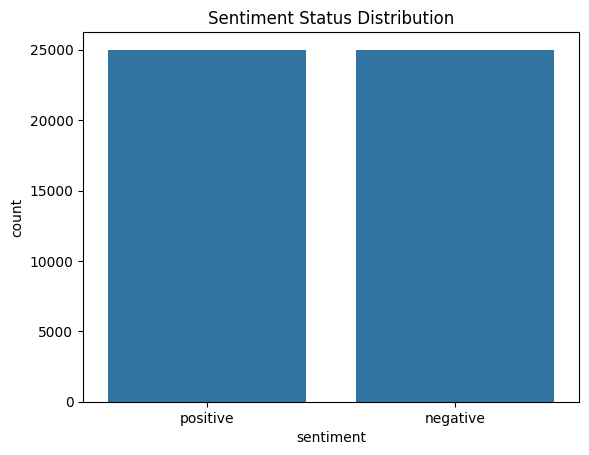

In [ ]:
sns.countplot(x="sentiment",data=data)
plt.title("Sentiment Status Distribution")

In [ ]:
# same the head() but this display zero to six not first five index in review
for i in range (7):
  print ("Review-{}". format (i))
  print(data[ 'review']. iloc[i],'\n')
  print ("Sentiment: ", data['sentiment']. iloc[i], '\n\n')

Review-0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [ ]:
def no_of_words (text):
  splitted_words = text.split()
  word_count = len(splitted_words)
  return word_count

In [ ]:
data['word_count'] = data['review'].apply(no_of_words)
data.head ()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Text(0.5, 0.98, 'Number of Words in Review')

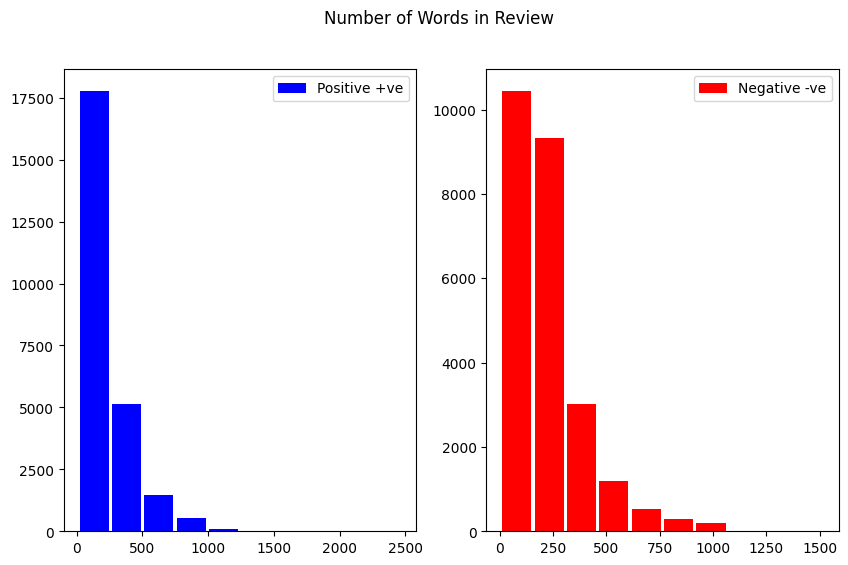

In [ ]:
fig, ax = plt.subplots (1,2, figsize= (10,6))
ax[0].hist(data[data['sentiment']=='positive']['word_count'],label='Positive +ve',color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(data[data['sentiment']=='negative']['word_count'], label= 'Negative -ve', color='red', rwidth=0.9)
ax[1].legend (loc='upper right')
fig.suptitle ("Number of Words in Review")

In [ ]:
#replace name of positive to 1
#replace name of negative to 0
data.sentiment.replace('positive', 1, inplace=True)
data.sentiment.replace('negative', 0, inplace=True)
data.head ()

<ipython-input-14-259f2892dea6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.sentiment.replace('positive', 1, inplace=True)
<ipython-input-14-259f2892dea6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
# Cleaning dataset from unrelated txt in review column, such as HTML tags, URLS, stop words and special char.
def data_preprocessing(text):
  text = text.lower ()
  text = re.sub('<br />', '',text)
  text = re.sub(r"http\S+|www\S+|https\S+",'', text, flags=re.MULTILINE)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
# Applying data_preprocessing function IDMB data frame.
data.review = data['review'].apply(data_preprocessing)
duplicated_cnt = data.duplicated().sum()
print("Number of duplicate entries: {}".format(duplicated_cnt))
data.head ( )

Number of duplicate entries: 421


,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [ ]:
data.review = data['review'].apply(data_preprocessing)
duplicated_cnt = data.duplicated().sum()
print ("Number of duplicate entries: {}".format(duplicated_cnt))
print (data.head())
data = data.drop_duplicates('review')

Number of duplicate entries: 421
                                              review  sentiment  word_count
0  one reviewers mentioned watching 1 oz episode ...          1         307
1  wonderful little production filming technique ...          1         162
2  thought wonderful way spend time hot summer we...          1         166
3  basically theres family little boy jake thinks...          0         138
4  petter matteis love time money visually stunni...          1         230


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
data.review = data['review'].apply(lambda x: stemming(x))
data['word count'] = data['review'].apply(no_of_words)
data.head()

,review,sentiment,word_count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
3,basically theres family little boy jake thinks...,0,138,67
4,petter matteis love time money visually stunni...,1,230,125


In [ ]:
pos_reviews = data[data.sentiment==1]
pos_reviews.head()

,review,sentiment,word_count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
4,petter matteis love time money visually stunni...,1,230,125
5,probably alltime favorite movie story selfless...,1,119,58


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 11.3 MB/s eta 0:00:00


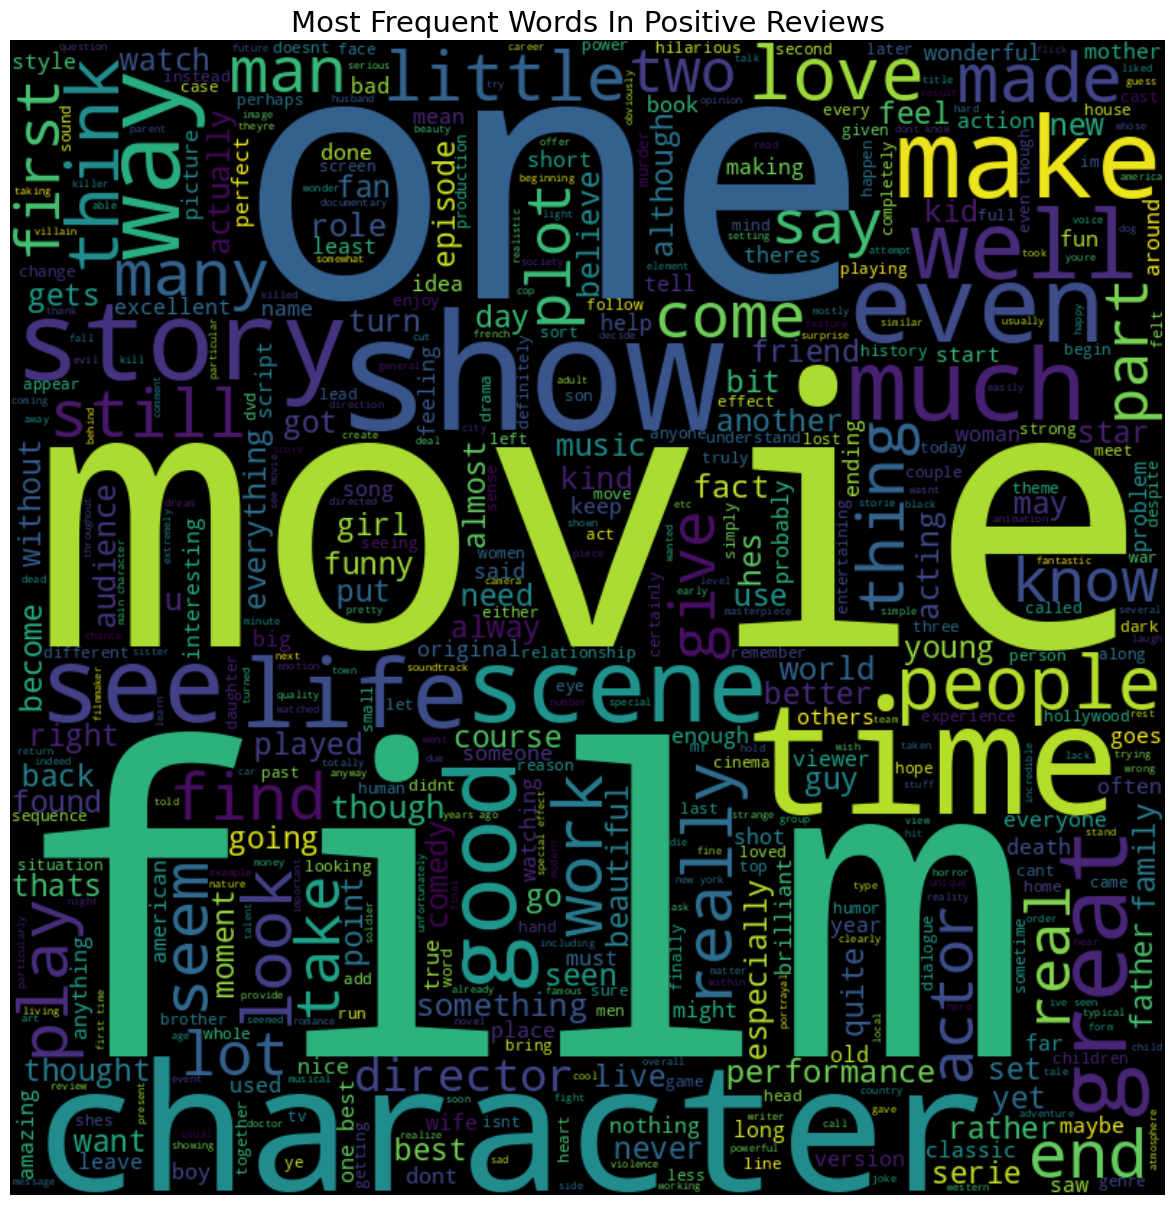

In [ ]:
from wordcloud import WordCloud
text = ''.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=800, height=800).generate(text)
plt. imshow(wordcloud, interpolation= 'bilinear')
plt.axis ('off')
plt. title('Most Frequent Words In Positive Reviews', fontsize=21)
plt.show()

In [ ]:
from collections import Counter
count= Counter()
for text in pos_reviews[ 'review'].values:
  splitted_text = text.split()
  for word in splitted_text:
    count[word] += 1
print("Count of most frequent positive words: -")
count.most_common( )

Count of most frequent positive words: -


[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971),
 ('first', 8818),
 ('films', 8433),
 ('love', 8363),
 ('people', 8333),
 ('best', 8268),
 ('get', 8151),
 ('way', 7524),
 ('many', 7488),
 ('life', 7340),
 ('characters', 7146),
 ('think', 7091),
 ('movies', 7058),
 ('made', 6966),
 ('two', 6845),
 ('dont', 6573),
 ('seen', 6572),
 ('watch', 6422),
 ('character', 6418),
 ('show', 6373),
 ('little', 6367),
 ('make', 6271),
 ('still', 6257),
 ('never', 6244),
 ('could', 6083),
 ('man', 5876),
 ('know', 5634),
 ('years', 5293),
 ('ever', 5225),
 ('end', 5043),
 ('scene', 4940),
 ('real', 4852),
 ('say', 4775),
 ('back', 4722),
 ('scenes', 4713),
 ('makes', 4672),
 ('acting', 4599),
 ('new', 4571),
 ('better', 4542),
 ('go', 4527),
 ('plot', 4505),
 ('us', 4502),
 ('find',

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
x = data['review']
Y = data['sentiment']
vectorize = TfidfVectorizer()
x = vectorize.fit_transform(data['review'])
x_train,x_test,y_train,y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

# print("Size of x_train: {}".format(x_train.shape))
# print("Size of y_train: {}".format(y_train.shape))
# print("Size of x_test: {}".format(x_test.shape))
# print("size of y_test: {}".format(y_test.shape))

In [ ]:
!pip uninstall -y tensorflow tensorflow-lite tflite-runtime


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 730.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 127.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.17.0 requires tensorflow<2.18,>=2.17.0, but you have tensorflow 2.18.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6343 - loss: 0.7103
Epoch 2/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7989 - loss: 0.4603
Epoch 3/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8344 - loss: 0.4104
Epoch 4/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8493 - loss: 0.3828
Epoch 5/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8579 - loss: 0.3684
Epoch 6/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8652 - loss: 0.3491
Epoch 7/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8744 - loss: 0.3247
Epoch 8/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.8696 - loss: 0.3347
Epoch 9/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8805 - loss: 0.3054
Epoch 10/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8836 - loss: 0.3132
Epoch 11/15
3471/3471 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8903 - loss: 0.2913
Epoch 12/15
3471/34

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │       3,547,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,095,148 (27.07 MB)

 Trainable params: 3,547,545 (13.53 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 3,547,547 (13.53 MB)

In [ ]:
# Before calling model.evaluate, convert y_test to float32
y_test = y_test.astype(np.float32)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8753 - loss: 0.3334
Test accuracy: 0.8767648339271545
Test loss: 0.33348381519317627


In [ ]:
model.save('trained_model.h5')

In [ ]:
import pickle

# Save the trained model
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
# Load the saved vectorizer and model
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorize, vectorizer_file)



In [ ]:
import pickle

# Load the saved vectorizer and model
with open('vectorizer.pkl', 'rb') as vectorizer_file: # Changed 'wb' to 'rb' for reading
    loaded_vectorizer = pickle.load(vectorizer_file)

# Load the saved model (if needed)
with open('trained_model.pkl', 'rb') as model_file: # Changed 'wb' to 'rb' for reading
    loaded_model = pickle.load(model_file)

# Transform a new input text
new_text= input("enter the text: ")
new_text_tfidf = loaded_vectorizer.transform([new_text])

# Predict using the loaded model
prediction = loaded_model.predict(new_text_tfidf)
print(f"Prediction: {prediction[0]}")  # Output will be 1 (Positive) or 0 (Negative)

if prediction[0] <=1 and prediction[0] >=0.5:
  print("Positive")
else:
  print("Negative")
#if 0 to 0.5 negtive bad news
#good news



enter the text: galal us very fucking happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction: [0.8525678]
Positive


In [ ]:
model.save_weights('model_weights.weights.h5')  # Save model weights

In [ ]:
import torch

# Save the entire model, including the architecture
torch.save(model, '/content/model_weights.weights.h5')


In [ ]:
# ... previous code ...

# Save the TensorFlow model using the `save` method:
model.save('/content/model_weights.weights.h5')  # Save entire model

# ... later, when you need to load the model ...

# Load the TensorFlow model using `load_model`:
from tensorflow.keras.models import load_model
model = load_model('/content/model_weights.weights.h5')

# ... rest of your code ...

In [ ]:
import torch
import torch.nn as nn

# Define a simple model for demonstration
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
model = SimpleModel()

# Save the model's weights
torch.save(model.state_dict(), "model_weights.pt")
print("Model weights saved as 'model_weights.pt'.")



Model weights saved as 'model_weights.pt'.


In [ ]:
# Create the same model architecture
model = SimpleModel()

# Load the saved weights
model.load_state_dict(torch.load("model_weights.pt"))

# Set the model to evaluation mode
model.eval()
print("Model weights loaded successfully.")


Model weights loaded successfully.


<ipython-input-40-a513c100458c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weights.pt"))
